## Linear Regression Analysis

The objective of a linear regression is to predict a quantitative answer $y$ based on predictor variables $x$, estabilishing a linear connection between both variables.

$y = \beta_0 + \beta_1x$

Where $y$ represents the variable we want to predict, $x$ the characteristics, $\beta_0$ the regression intercept and $\beta_1$ the coefficient to $x$.

### Estimating patterns of a linear regression model

To create a linear regression model, first it is needed to estimate the coefficients $\beta_0$ e $\beta_1$ so your model *fit* to your observed data $y$ in the best possible way. One of way of estimating the coefficient (parameters) is the least squares approximation:

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_i$

The predictor $\hat{y}_i$ of ith Y variable value with ith X variable value.


The least squares method uses the error given by: 


$e_i = y_i - \hat{y}_i$

Where $y_i$ and $\hat{y}_i$ represent the observed and estimated values, respectively, to minimize the sum of squared errors given by:



$RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$ (*Residual Sum of Squares*)

The values that minimize your Residual sum of squares for $\beta_0$ and $\beta_1$ can be obtained through:

$ \hat{\beta}_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x}_i)(y_i - \bar{y}_i)}{\sum_{i=1}^{n}(x_i - \bar{x}_i)^2} $

and

$ \hat{\beta}_0 = \bar{y}-\hat{\beta}_1\bar{x} $

Where $n$ is the number of observations and  $\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$, $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$ are the mean value of the samples for $y$ e $x$, respectively..



### Training on Linear Regression using Python tools:

 - **Importing libraries**

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt


 - **To see your plots inline:**

In [5]:
%matplotlib inline

 - **Acessing your data**

In [6]:
data1 = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
data1.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data1.shape

(200, 4)

We've got 200 samples and 3 characteristics,that will be used to predict **Sales**. 

- **Estabilishing relations between characteristics and sales through graphic plots**:
  - Creating three sub-plots with matplotlib;
  - Sharing the y axis, that is our common output;
  - Adding our data to each sub-plot created.
    
  

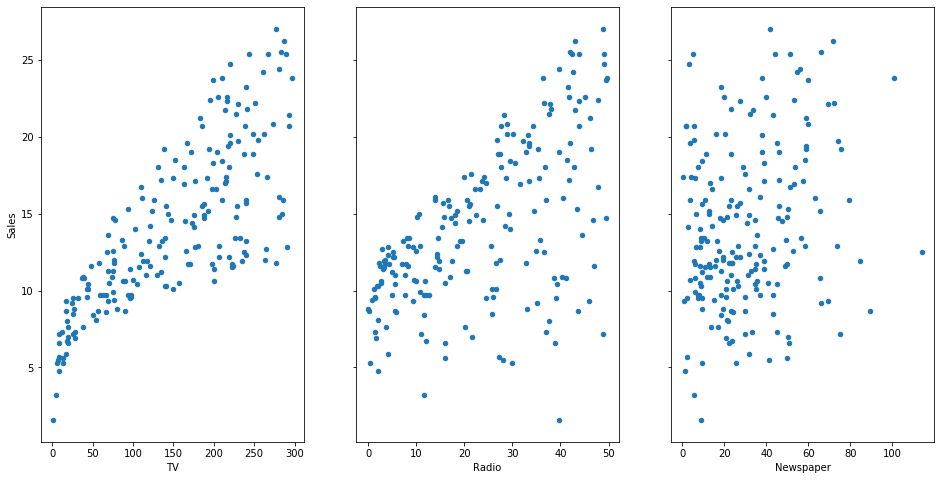

In [8]:
fig, axs = plt.subplots(1,3, sharey=True)
data1.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
data1.plot(kind = 'scatter', x='Radio', y='Sales', ax=axs[1], figsize=(16,8))
data1.plot(kind= 'scatter', x='Newspaper', y= 'Sales', ax=axs[2], figsize=(16,8))

The least scattered, and most linear plot represents the most approximate relationship between two variables;
In our case, we can see that the "TV" advertising has more linear relation to the sales rise, therefore we can conclude that this method is the most responsible to our sales rise, followed by radio.

On the other hand, the most scattered graph, "Newspaper", shows no relation between Newspaper advertising and sales' rise.

 - **Adjusting a model of simple linear regression**

 - Using statsmodels library:
   - importing R's formula function, emulating R's formulary description in the format answer variable ~ predictor variable
 - Creating your model.
 - 'Fiting your model'.
 - Printing your obtained parameters, where $ intercept= {\beta}_0 $ and $ {\beta}_1$ =is related to x 

In [9]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~TV', data=data1)
lm=lm.fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [10]:
lm2= smf.ols(formula='Sales~Radio', data=data1)
lm2=lm2.fit()
lm2.params

Intercept    9.311638
Radio        0.202496
dtype: float64

In [11]:
lm3=smf.ols(formula='Sales~Newspaper', data=data1)
lm3=lm3.fit()
lm3.params

Intercept    12.351407
Newspaper     0.054693
dtype: float64

- Using your model to predict sales in the future 

$$y = \beta_0 + \beta_1x$$
Where x will be your investment on a media channel.

$$y = 7.032594 +  0.047537x$$
For TV
$$y = 9.311638 + 0.202496x $$
For Radio 
$$y =12.351407 + 0.054693x $$ 
For Newspaper


All the values can be calculated manually, through variables. They can be calculated using Statsmodels library.

- **Statsmodels library prediction:**
  - The imput to Stats models library, your x value, will be a dataframe;
    - Create a data frame with your x value
  - Use the function `linearmodel.predict(dataframe)` to relate your simple linear regression values to your data frame;
  - Create a Data frame with minimum and maximum values;
  - Associate your predictions with your minimum and maximum values, armazenating it within a variable.
  - Plot observed data.

In [12]:
#Supposing and investment of $50,000
X_tv = pd.DataFrame({'TV':[50]})
X_radio = pd.DataFrame({'Radio': [50]})
X_newspaper = pd.DataFrame({'Newspaper': [50]})




In [13]:
X_tv.head()

,TV
0,50


In [14]:
X_radio.head()


,Radio
0,50


In [15]:
X_newspaper.head()

,Newspaper
0,50


In [16]:
lm.predict(X_tv)


0    9.409426
dtype: float64

In [17]:
lm2.predict(X_radio)

0    19.436427
dtype: float64

In [18]:
lm3.predict(X_newspaper)

0    15.086062
dtype: float64

In [19]:
X_tv = pd.DataFrame({'TV': [data1.TV.min(), data1.TV.max()]})
X_tv.head()

,TV
0,0.7
1,296.4


In [20]:
X_radio = pd.DataFrame({'Radio':[data1.Radio.min(), data1.Radio.max()]})
X_radio.head()

,Radio
0,0.0
1,49.6


In [21]:
X_newspaper = pd.DataFrame({'Newspaper':[data1.Newspaper.min(), data1.Newspaper.max()]})
X_newspaper.head()

,Newspaper
0,0.3
1,114.0


In [22]:
predtv= lm.predict(X_tv)
predrad=lm2.predict(X_radio)
prednew=lm3.predict(X_newspaper)

In [23]:
predtv

0     7.065869
1    21.122454
dtype: float64

In [24]:
predrad

0     9.311638
1    19.355429
dtype: float64

In [25]:
prednew

0    12.367815
1    18.586420
dtype: float64

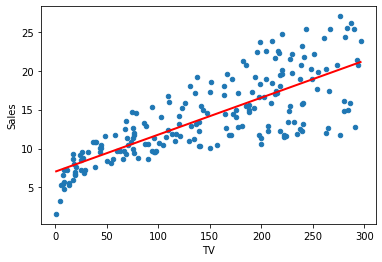

In [26]:
data1.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X_tv, predtv, c='red', linewidth=2)

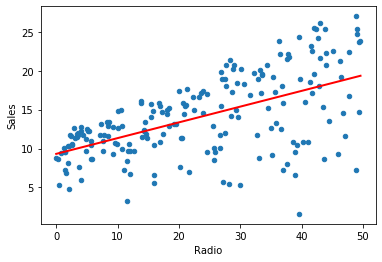

In [27]:
data1.plot(kind= 'scatter', x='Radio', y='Sales')
plt.plot(X_radio, predrad, c='red', linewidth=2)

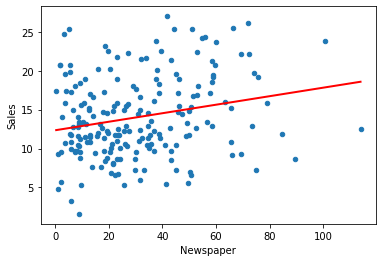

In [28]:
data1.plot(kind='scatter', x='Newspaper', y='Sales')
plt.plot(X_newspaper, prednew, c='red', linewidth=2)

### Estimating confidence intervals


The populational mean, $\mu$ zgiven by: $\hat{\mu} = \bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$, 
    can have it's accuracy tested  by the Standard Error measure:
$
\begin{align}
Var(\hat{\mu})=SE(\hat{\mu})^2=\frac{\sigma^2}{n}
\end{align}
$

where $\sigma$ it's the standart deviation of $y$.

We can also calculate errors related to $\hat{\beta_0}$ + $\hat{\beta_1}$ like:

$ SE(\hat{\beta_0})^2 = \sigma\left[\frac{1}{n}+\frac{\bar{x}}{\sum_{i=1}^{n}(x_i-\bar{x})^2}\right] $

and

$ SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2} $

where $ \sigma^2 = Var(\epsilon)$.

Standard errors can be used to calculate confidence intervals. A confidence interval, is defined as a series of values of which, with the  given probability (generally 0.95) the series will contain the true value (unknown) of the populational parameter. The series is defined by the inferior and superior limits of the sample data. For linear regression the 0.95 confidence interval for  $\beta_1$  is given by: 

$ \hat{\beta_1} \pm 2SE(\hat{\beta_1})$

In [29]:
import numpy as np

In [30]:
seTV = (data1['Sales'].std()/np.sqrt(data1.shape[0]))/data1['TV'].std()
0.047537-(2*seTV)

0.03894266831291113

In [31]:
seRadio = (data1['Sales'].std()/np.sqrt(data1.shape[0]))/data1['Radio'].std()
0.202496-(2*seRadio)

0.1527977938146331

In [32]:
seNews = (data1['Sales'].std()/np.sqrt(data1.shape[0]))/data1['Newspaper'].std()
0.054693-(2*seNews)


0.020812994966491298

To obtain confidence intervals, you use the method based on your linear model, using the function `linearmodel.conf_int()`

In [33]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [34]:
lm2.conf_int()

,0,1
Intercept,8.201588,10.421688
Radio,0.162244,0.242747


In [35]:
lm3.conf_int()

,0,1
Intercept,11.125956,13.576859
Newspaper,0.022005,0.087381


### Hypotesis test

You can use your standard errors to verificate how related are your coefficients, where:
$H_0:\beta_1=0$* X and Y are not related*
$H_a: \beta_1 \neq 0 * X and Y are related*

Later you can obtain the *p-value*, calculating *t*:

$ t = \frac{\hat{\beta}-0}{SE(\hat{\beta})} $

With the comparation of  $t$ calculated from a distribution $t$ and the appropriate freedom degrees, the probability of observing a value equal or greater than $|t|$, assuming $\beta_1=0$, can be obtained. This probability test is known as p-value.

Your p-value can be obtained  by the function `linearmodel.pvalues`

In [36]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [37]:
lm2.pvalues

Intercept    3.561071e-39
Radio        4.354966e-19
dtype: float64

In [38]:
lm3.pvalues

Intercept    4.713507e-49
Newspaper    1.148196e-03
dtype: float64

### Measuring the model fit

It's used the Coefficient of Determination ($R^2$), that measures the variance proportion explained by the regression model. $R^2$ assumes a value between 0 and 1 and is independent from Y's scale.
$R^2$ is calculated as:



$R^2= 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y}_i)^2} $


With your linear model, the function for calculating $R^2$ is `linearmodel.rsquared`

print("R² for TV data:",lm.rsquared)

In [39]:
print("R² for Radio data:",lm2.rsquared)

R² for Radio data: 0.33203245544529547


In [40]:
print("R² for Newspaper data:",lm3.rsquared)

R² for Newspaper data: 0.05212044544430516


### Fitting a multiple regression analysis model

A simple linear regression system can be expanded to fit in multiple characteristics or parameters, where each $x$ characteristics has a $\beta$ coefficient associated.
$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$


For our data, the multiple regression analyisis would be:
$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

- Create a linear model combining all characteristics
- Print your coefficients
- Print the summary of model adjustment

In [41]:
lm4 = smf.ols(formula = 'Sales ~ TV+  Radio + Newspaper', data=data1).fit()
lm4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [42]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 04 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        14:03:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary above it can be observed that the "Newspaper" variable is not related to the "Sales", as for the p-value of this variable is non-significative (p = 0.860; p>0.05), so $\beta=0$ and we reject the correlation hypotesis.The Coefficient of Determination ($R^2$) 0.897, it's greater than the  $R^2$ observed for simple linear regression(0.612), which indicates the impact of adding characteristics for a more relevant model.

### Linear regression with Scikit-Learn library

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
char_name = ['TV', 'Radio', 'Newspaper']
X= data1[char_name]
Y= data1.Sales
X.shape

(200, 3)

In [45]:
lm5 = LinearRegression()
lm5.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(lm5.intercept_)
print(lm5.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [47]:
list(zip(char_name, lm5.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

In [48]:
lm5.predict(pd.DataFrame([100,25,25]).T)

array([12.20266701])

In [49]:
lm5.score(X,Y)

0.8972106381789521

### Linear regression with categorical predictors
- Creating a new characteristic named "Size" of the advertising, attributing observations such as big or small.
- These characteristics are created as a boolean value, with binary characteristics.

In [50]:
import numpy as np
np.random.seed(12345)
numb = np.random.rand(len(data1))
bigmodl = numb>0.5


data1['Size'] = 'small'
data1.loc[bigmodl, 'Size'] = 'big'
data1.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,big
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,big


In [51]:
data1[" I' ts big?"] = data1.Size.map({'small':0, 'big':1})
data1.head()

,TV,Radio,Newspaper,Sales,Size,I' ts big?
1,230.1,37.8,69.2,22.1,big,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,big,1


In [54]:
char_name2 = ['TV', 'Radio', 'Newspaper', " I' ts big?"]
X= data1[char_name2]
Y= data1.Sales
lm6 = LinearRegression()
lm6.fit(X,Y)
list(zip(char_name2, lm6.coef_))

[('TV', 0.04571982092436277),
 ('Radio', 0.1887281431342785),
 ('Newspaper', -0.001097679448351624),
 (" I' ts big?", 0.05742385085482783)]